In [16]:
"""
JAZIEL VILLARREAL DUARTE  1919246
SERGIO MAXIMINO MELCHOR VILLEGAS  1919712
KEVIN ALEXIS MARTINEZ GARCIA  1923760
NESTOR OCTAVIO GUAJARDO RODRIGUEZ 1949900 
"""

'\nJAZIEL VILLARREAL DUARTE  1919246\nSERGIO MAXIMINO MELCHOR VILLEGAS  1919712\nKEVIN ALEXIS MARTINEZ GARCIA  1923760\nNESTOR OCTAVIO GUAJARDO RODRIGUEZ 1949900 \n'

In [ ]:
import tensorflow as tf
import tensorflow_datasets as tfds

import math
import numpy as np
import matplotlib.pyplot as plt
import logging
logger = tf.get_logger()

import cv2
import matplotlib.pyplot as plt
import glob

logger.setLevel(logging.ERROR)

In [ ]:
dataset, metadata = tfds.load('mnist', as_supervised=True, with_info=True)
train_dataset, test_dataset = dataset['train'], dataset['test']

file = '/content/1' 

for x in glob.iglob(f'train'):
  #plt.imshow(x, cmap='gray')
  print(x)
  test_image = cv2.imread(x, cv2.IMREAD_GRAYSCALE )

class_names = [
    'Cero', 'Uno', 'Dos', 'Tres', 'Cuatro', 'Cinco', 'Seis',
    'Siete', 'Ocho', 'Nueve'
]

num_train_examples = metadata.splits['train'].num_examples
num_test_examples = metadata.splits['test'].num_examples

In [ ]:
#Normalizar: Numeros de 0 a 255, que sean de 0 a 1
def normalize(images, labels):
    images = tf.cast(images, tf.float32)
    images /= 255
    return images, labels

train_dataset = train_dataset.map(normalize)
test_dataset = test_dataset.map(normalize)

In [ ]:
#Estructura de la red
model = tf.keras.Sequential([
	tf.keras.layers.Flatten(input_shape=(28,28,1)),
	tf.keras.layers.Dense(64, activation=tf.nn.relu),
	tf.keras.layers.Dense(64, activation=tf.nn.relu),
	tf.keras.layers.Dense(10, activation=tf.nn.softmax) #para clasificacion
])

In [ ]:
#Indicar las funciones a utilizar
model.compile(
	optimizer='adam',
	loss='sparse_categorical_crossentropy',
	metrics=['accuracy']
)

In [ ]:
#Aprendizaje por lotes de 32 cada lote
BATCHSIZE = 32
train_dataset = train_dataset.repeat().shuffle(num_train_examples).batch(BATCHSIZE)
test_dataset = test_dataset.batch(BATCHSIZE)

In [ ]:
#Realizar el aprendizaje
model.fit(
	train_dataset, epochs=5,
	steps_per_epoch=math.ceil(num_train_examples/BATCHSIZE)
)

Epoch 1/5
1875/1875 [==============================] - 17s 5ms/step - loss: 0.2692 - accuracy: 0.9216
Epoch 2/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.1157 - accuracy: 0.9653
Epoch 3/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0831 - accuracy: 0.9750
Epoch 4/5
1875/1875 [==============================] - 11s 6ms/step - loss: 0.0691 - accuracy: 0.9790
Epoch 5/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0565 - accuracy: 0.9818


313/313 [==============================] - 3s 7ms/step - loss: 0.0891 - accuracy: 0.9724
Resultado en las pruebas:  0.9724000096321106
1/1 [==============================] - 0s 161ms/step


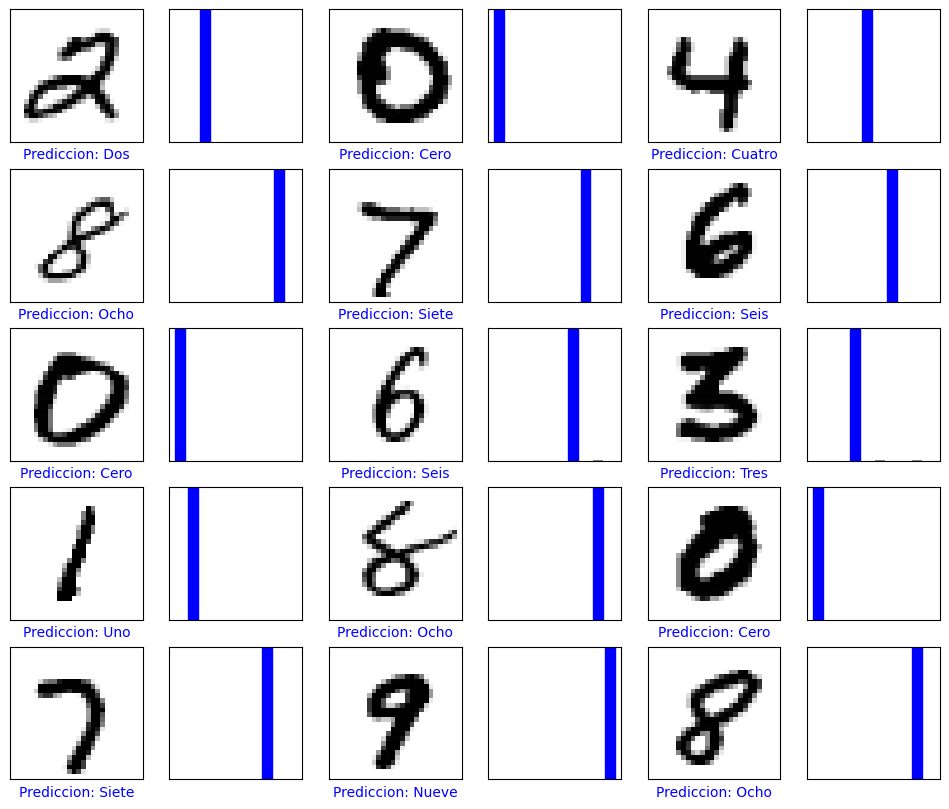

In [ ]:
#Evaluar nuestro modelo ya entrenado, contra el dataset de pruebas
test_loss, test_accuracy = model.evaluate(
	test_dataset, steps=math.ceil(num_test_examples/32)
)

print("Resultado en las pruebas: ", test_accuracy)


for test_images, test_labels in test_dataset.take(1):
	test_images = test_images.numpy()
	test_labels = test_labels.numpy()
	predictions = model.predict(test_images)

def plot_image(i, predictions_array, true_labels, images):
	predictions_array, true_label, img = predictions_array[i], true_labels[i], images[i]
	plt.grid(False)
	plt.xticks([])
	plt.yticks([])

	plt.imshow(img[...,0], cmap=plt.cm.binary)

	predicted_label = np.argmax(predictions_array)
	if predicted_label == true_label:
		color = 'blue'
	else:
		color = 'red'

	plt.xlabel("Prediccion: {}".format(class_names[predicted_label]), color=color)

def plot_value_array(i, predictions_array, true_label):
	predictions_array, true_label = predictions_array[i], true_label[i]
	plt.grid(False)
	plt.xticks([])
	plt.yticks([])
	thisplot = plt.bar(range(10), predictions_array, color="#888888")
	plt.ylim([0,1])
	predicted_label = np.argmax(predictions_array)

	thisplot[predicted_label].set_color('red')
	thisplot[true_label].set_color('blue')

numrows=5
numcols=3
numimages = numrows*numcols

plt.figure(figsize=(2*2*numcols, 2*numrows))
for i in range(numimages):
	plt.subplot(numrows, 2*numcols, 2*i+1)
	plot_image(i, predictions, test_labels, test_images)
	plt.subplot(numrows, 2*numcols, 2*i+2)
	plot_value_array(i, predictions, test_labels)

plt.show()